# META Stock Prices Prediction

![META Stock Prices Prediction](meta.jpg)

# Using LSTM for Stock Price Prediction
Once TensorFlow is installed, you can proceed with implementing LSTM for stock price prediction in your Jupyter Notebook. Here’s a summary of the steps

## 1. Import Required Libraries
Make sure to import necessary libraries including TensorFlow

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# 2. Load and Prepare Data
Load your dataset into a Pandas DataFrame. For this example, I'll assume you have historical stock price data in a CSV file named stock_data.csv. Adjust the path and columns accordingly based on your dataset.

In [3]:
dataset = pd.read_csv('META.csv')

In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,214.991898,13475000


In [5]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1084,2024-04-24,508.059998,510.000000,484.579987,493.500000,493.500000,37772700
1085,2024-04-25,421.399994,445.769989,414.500000,441.380005,441.380005,82890700
1086,2024-04-26,441.459991,446.440002,431.959991,443.290009,443.290009,32691400
1087,2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600
1088,2024-04-30,431.049988,439.619995,429.720001,430.170013,430.170013,18429500


In [24]:
for i, dim in enumerate(['Row', 'Column']):
    print(f"{dim} count: {dataset.shape[i]}")

Row count: 1089
Column count: 7


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB


In [28]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,265.106492,269.017264,261.475758,265.279651,265.021994,2.474032e+07
std,89.310933,89.910210,88.447719,89.178666,89.144503,1.618508e+07
min,90.080002,90.459999,88.089996,88.910004,88.815765,5.467500e+06
25%,200.149994,203.500000,195.490005,198.860001,198.649231,1.590590e+07
50%,267.170013,270.320007,263.600006,266.630005,266.347412,2.084450e+07
75%,323.529999,328.000000,319.459991,324.170013,323.826416,2.861860e+07
max,529.280029,531.489990,518.890015,527.340027,527.340027,2.323166e+08


In [35]:
dataset.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [36]:
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,214.991898,13475000


# 3. Preprocess Data
Prepare the data for training the LSTM model.

- Convert the 'Date' column to datetime format.
- Sort the dataset by date if it's not already sorted.
- Normalize the 'Close' price data using MinMaxScaler for better model performance.

In [43]:
# Convert Date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Sort by Date
dataset = dataset.sort_values('Date')

# Use only 'Close' price for prediction
data = dataset['Close'].values.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 4. Create Sequences for LSTM
Define a function to create sequences for LSTM training

create_sequences(data, seq_length) 
Converts the time series data into sequences suitable for LSTM training.

In [45]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length), 0]
        y = data[i+seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length (e.g., use 10 previous days to predict next day)
sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)


# 5. Split Data into Training and Testing Sets
Split the data into training and testing sets. Use, for example, the first 80% of data for training and the remaining 20% for testing.

In [46]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# 6. Build LSTM Model
Define and compile the LSTM model using Keras

- Use Sequential() to create the model.
- Add LSTM layers with return_sequences=True for stacked LSTM layers.
- Add Dense layers for output.

In [47]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Arsalan Khatri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 7. Train the Model
Train the LSTM model on the training data.

In [48]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0598
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1500e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1961e-04
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3663e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4674e-04
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0742e-04
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9443e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6212e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8394e-04
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8715e-04
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2683e-04
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8313e-04
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s

# 8. Evaluate the Model
Evaluate the model on the test data to see how well it predicts stock prices.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


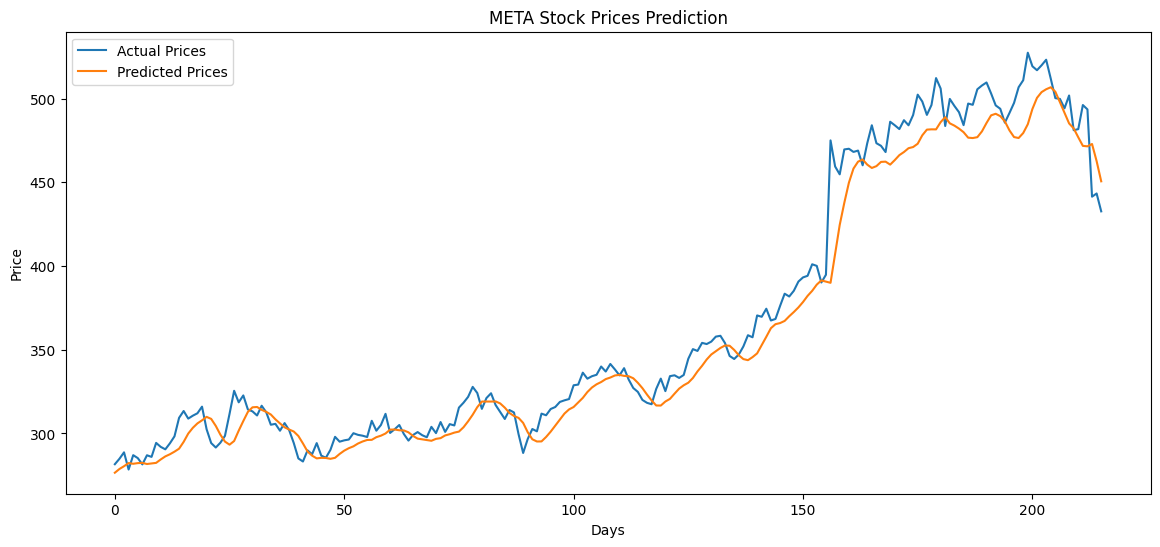

In [51]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Optionally, compare with actual test prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('META Stock Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Steps to Calculate Model Accuracy

## 1. Predict on Test Data
After training your LSTM model, you predict stock prices on the test set.

In [52]:
# Predict on test set
predicted_prices = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


## 2. Inverse Transform Predictions
Since you scaled your data before feeding it into the LSTM model (using MinMaxScaler), you need to inverse transform the predicted prices to get them back to the original scale.

In [53]:
# Inverse transform predictions
predicted_prices = scaler.inverse_transform(predicted_prices)

## 3. Calculate Metrics
To evaluate the accuracy of your model, you can use various metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Here’s an example of calculating RMSE:

In [54]:
from sklearn.metrics import mean_squared_error

# Inverse transform actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 14.47719053722832


# Conclusion

## Interpretation

An RMSE of **14.48** suggests that, on average, your LSTM model's predictions are approximately $14.48 away from the actual stock prices. This value indicates a moderate level of predictive accuracy, but its adequacy depends on the specific requirements and standards of your application.

## Continuous Improvement

Aim to iteratively improve your model based on performance metrics and domain knowledge. This process may involve refining the model architecture, optimizing hyperparameters, or exploring advanced techniques in time series forecasting.

In summary, while an RMSE of **14.48** provides a quantitative measure of prediction error, its evaluation as **"good" or "best"** should be contextualized within the specific application and its performance requirements. Strive to align your model's accuracy with the practical needs and objectives of your stock price prediction task.






